Osnabrück University - Computer Vision (Winter Term 2021/22) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 07: Fourier Transform

## Introduction

This week's sheet should be solved and handed in before the end of **Tuesday, January 11, 2022**. Therefore, the sheet is a bit longer and you can get a total of 26 points. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

**HINT: There is a bonus exercise in the end. If you do this bonus exercise you may leave out one of the other exercises.**

## Assignment 0: Math recap (Expectation and Variance) [0 Points] 

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is the relation between mean and expectated value? How to compute it?

YOUR ANSWER HERE

**b)** What is the variance? What does it express? Why is there a square in the formula?

YOUR ANSWER HERE

**c)** Can you compute mean and variance of a given 1-dimensional dataset (e.g., $D=\{9,10,11,7,13\}$). Can you do the same for a 3-dimensional dataset (e.g., D=\{(1,10,9), (1,10,10), (10,10,11), (19,10,7), (19,10,13)\})?

YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE

## Exercise 1: Understanding Fourier Transform [7 points]

This exercise aims at getting some intuition of finite, 2d-Fourier transform.

*Hint:* Python and numpy can deal with complex numbers: `np.real()` and `np.imag()` provide the real and imaginary parts. `np.abs()` and `np.angle()` provide amplitude and phase. `np.conj()` gives the complex conjugate.

**a)** Transform the image `dolly.png` into the frequency space (you may use the function
`numpy.fft.fft2`). The result will be a complex matrix. Plot histograms for the amplitude and phase
values. You may take the logarithm of the amplitude to enhance contrast.

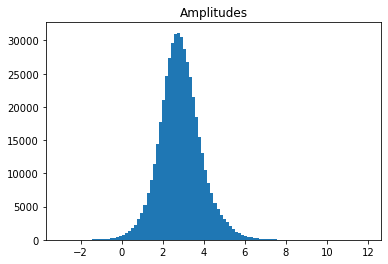

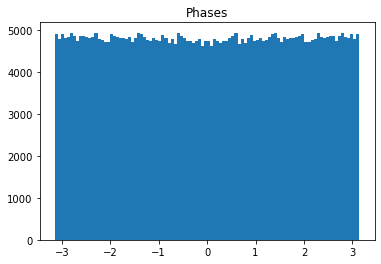

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')
ft_img = np.fft.fft2(img)
amplitudes = [np.abs(entry) for entry in ft_img.flatten()]
phases = [np.angle(entry) for entry in ft_img.flatten()]
plt.hist(np.log(amplitudes), 100, (np.log(min(amplitudes)), np.log(max(amplitudes))))
plt.title('Amplitudes')
plt.show()
plt.hist(phases, 100, (min(phases), max(phases)))
plt.title('Phases')
plt.show()

**b)** Display the amplitude and phase in separate images. You may again take the logarithm of
the amplitude to enhance the contrast. You may also center the base frequency (see function `numpy.fft.fftshift`). Compare your results with CV-09, slide 33.

<function matplotlib.pyplot.show(close=None, block=None)>

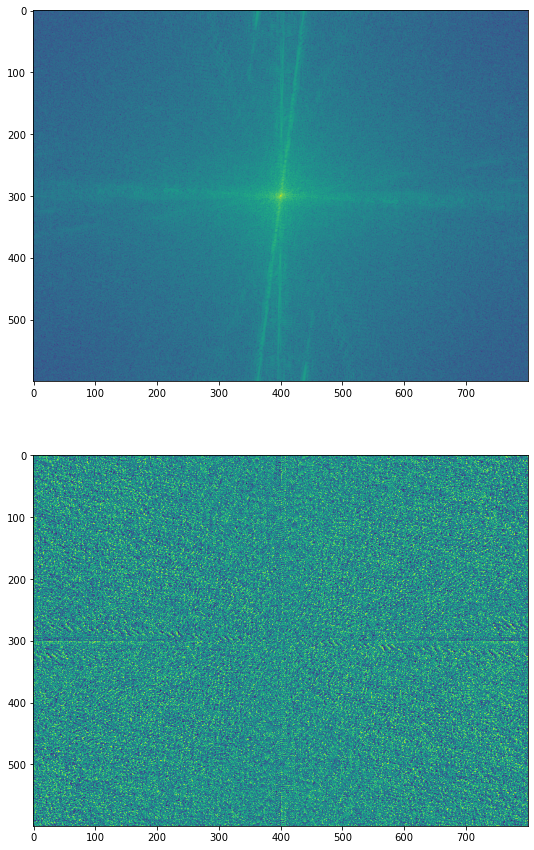

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')
ft_img_shifted = np.fft.fftshift(np.fft.fft2(img))
amplitudes = np.abs(ft_img_shifted)
phases = np.angle(ft_img_shifted)

plt.figure(figsize = (12, 15))
plt.subplot(2,1,1)
plt.imshow(np.log(amplitudes))
plt.show

plt.subplot(2,1,2)
plt.imshow(phases)
plt.show

**c)** Transform the image back from the frequency space to the image space (again using `fft2`).
What do you observe? Explain and repair the result.

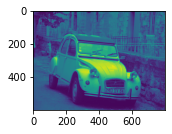

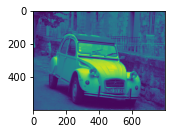

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')
ft_img = np.fft.fft2(img)
img_restored = np.fft.fft2(ft_img)

plt.subplot(2,1,1)
plt.imshow(img)
plt.show()

plt.subplot(2,1,2)
plt.imshow(np.fliplr(np.flipud(img_restored.real)))
plt.show()

As we can see, when restoring the original image from the FT just via fft2, the restored image is the original image fipped along both axes (horizontally and vertically). WHY?
We can fix this by flipping the resulting image once vertically and once horizontally.

**d)** Now restore the image, but only keep the amplitude and vary the phase. Try fixed phase
values (0, $\pi/2$,. . . ), a random phase matrix, or a noisy version of the original phase values.

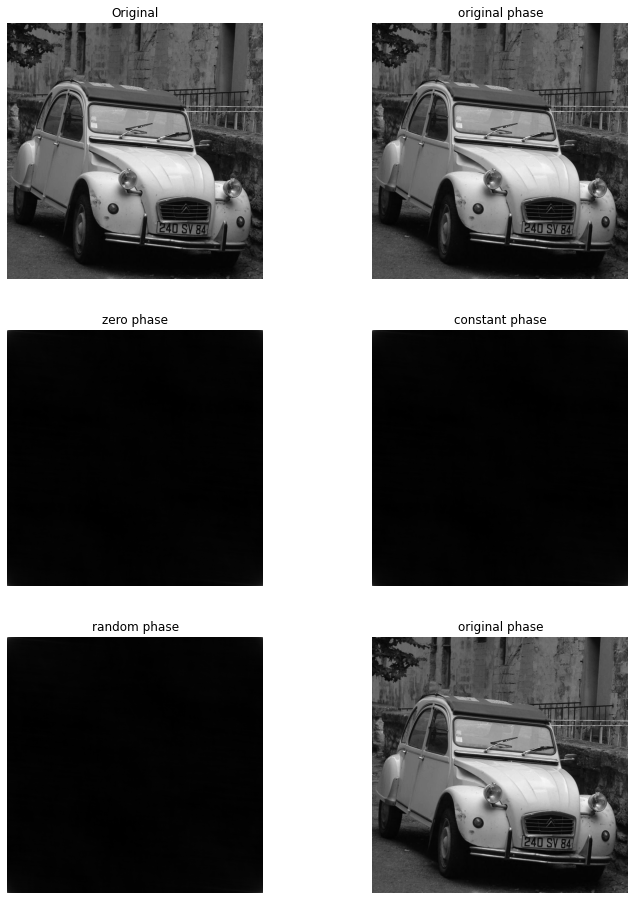

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dollySquared.jpg')

# Perform (fast) Fourier transform
ft = np.fft.fft2(img)

# Get amplitude and phase
amplitude = np.abs(ft)
phase = np.angle(ft)

phases = []
phases.append((phase, "original phase"))
phases.append((np.zeros(phase.shape), "zero phase"))
phases.append((np.ones(phase.shape)*phase.max(), "constant phase"))
phases.append((np.random.rand(*phase.shape), "random phase"))
phases.append((phase, "original phase"))

plt.figure(figsize=(12, 16)); plt.gray()
plt.subplot(3, 2, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')

for i, (phase, tit) in enumerate(phases):
    ft0 = amplitude * np.exp(1j * phase)
    img0 = np.abs(np.fft.ifft2(ft0))
    plt.subplot(3, 2, 2+i); plt.axis('off'); plt.title(tit)
    plt.imshow(img0)

plt.show()

**e)** We do the same, but now we keep the phase while varying the amplitude values, i.e. constant,
amplitude, randomly distributed amplitudes and noisy versions of the the original values.

Explain the results!


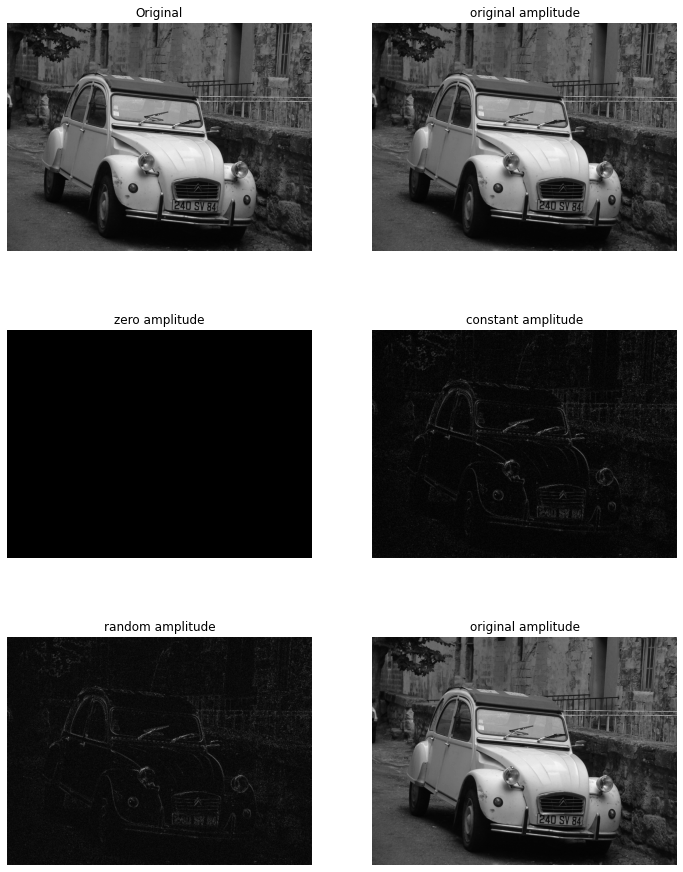

In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# Perform (fast) Fourier transform
ft = np.fft.fft2(img)

# Get amplitude and phase
amplitude = np.abs(ft)
phase = np.angle(ft)

amplitudes = []
amplitudes.append((amplitude, "original amplitude"))
amplitudes.append((np.zeros(amplitude.shape), "zero amplitude"))
amplitudes.append((np.ones(amplitude.shape)*amplitude.max(), "constant amplitude"))
amplitudes.append((np.random.rand(*amplitude.shape), "random amplitude"))
amplitudes.append((amplitude, "original amplitude"))

plt.figure(figsize=(12, 16)); plt.gray()
plt.subplot(3, 2, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')

for i, (amp, tit) in enumerate(amplitudes):
    ft0 = amp * np.exp(1j * phase)
    img0 = np.abs(np.fft.ifft2(ft0))
    plt.subplot(3, 2, 2+i); plt.axis('off'); plt.title(tit)
    plt.imshow(img0)

plt.show()

YOUR ANSWER HERE

## Exercise 2: Implementing Fourier Transform [6 points]

**a)** 
Explain in your own words the idea of Fourier transform. What is the frequency space? What does a point in that space represent?

The idea of fourier transform is to extract the underlying sinus functions that make up a signal. To achieve this what fourier transform does is convert a signal into its frequency space. The x-axis of the frequency space represents the frequency and the y-axis how much of a signal lies within the given frequency. A point in frequency space therefore represents how much a certain frequency contributed to the final signal.

**b)** First implement a one-dimensional discrete version of Fourier transform, i.e. use the formula
$$ c_n = \sum_{x=0}^{L-1} f(x)\cdot e^{-\tfrac{2\pi i\cdot n}{L}\cdot x} \qquad \text{for $n=0,\ldots,L-1$}$$
for complex valued coefficients.

Plot the graph and the results of your Fourier transform, using the Matplotlib function `plot()`, for different functions. Compare your results with the output of the function `numpy.fft.fft`.

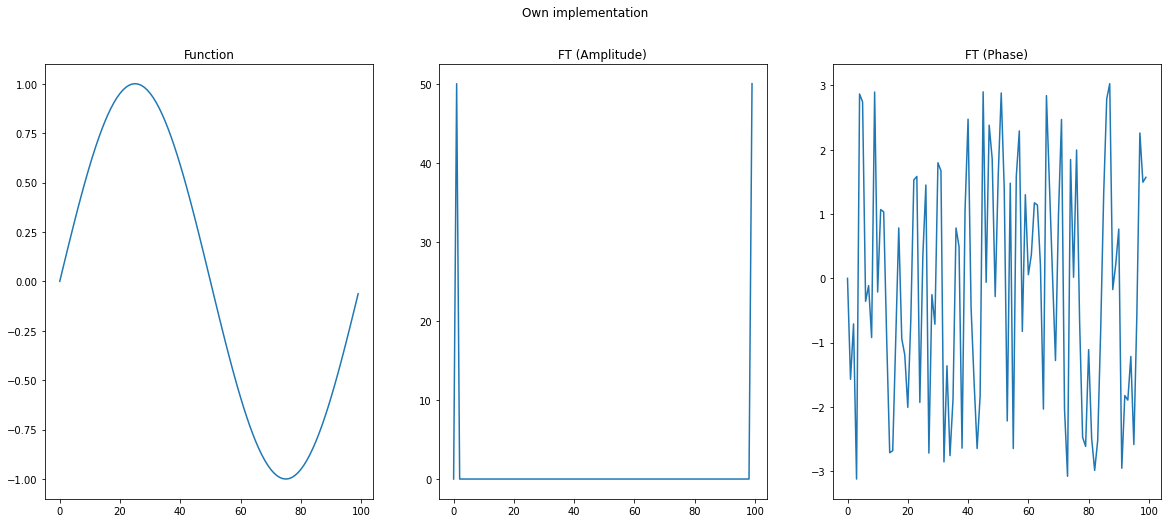

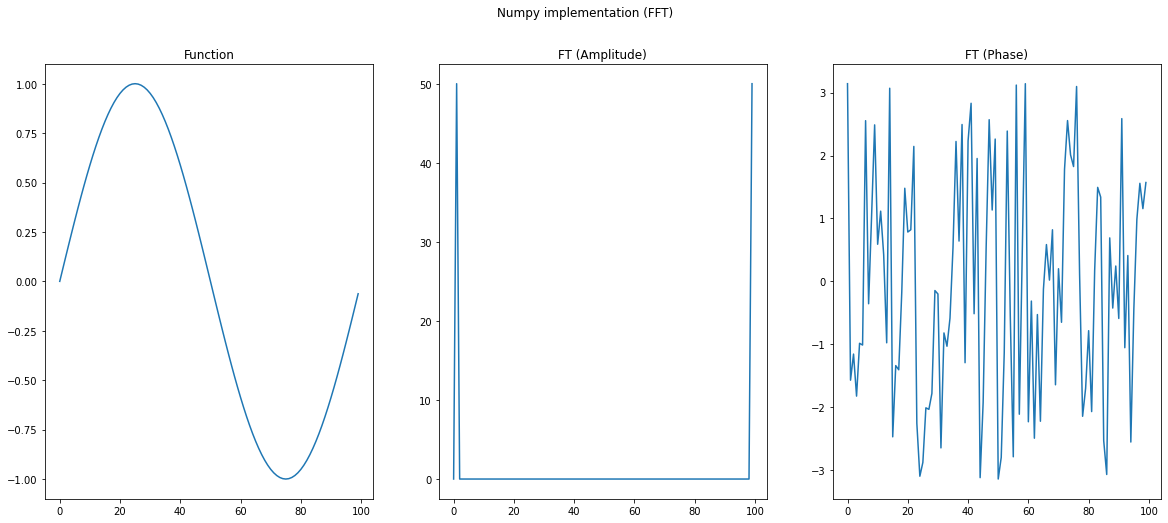

In [4]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt


def fourier1d(func):
    """
    Perform a discrete 1D Fourier transform.
    
    Args:
        func (ndarray): 1-D array containing the function values.
    
    Returns:
        ndarray (complex): The Fourier transformed function.
    """
    L = func.shape[0]
    ft = np.zeros(L, dtype=complex)
    for n in range(L):
        c_n = sum(func[x]*np.exp(-2j*np.pi*n*x/L) for x in range(L))
        ft[n] = c_n
    return ft


# number of points
L = np.arange(100)


def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


func = np.sin(2 * np.pi * L / len(L))


# Own implementation.
ft = fourier1d(func)
plt.figure(figsize=(20, 8))
plt.suptitle('Own implementation');
plt.subplot(1, 3, 1); plt.plot(L,func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft)); plt.title('FT (Phase)')
plt.show()

# Numpy implementation.
ft = np.fft.fft(func)
plt.figure(figsize=(20, 8))
plt.suptitle('Numpy implementation (FFT)')
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft)); plt.title('FT (Phase)')
plt.show()


**c)** Now implement a 2-dimensional version of Fourier transform for images, using the formula from the lecture. Compare your result with the output of `fft2`.

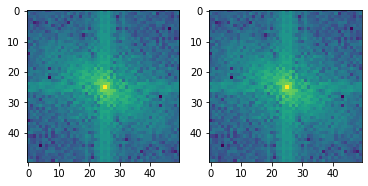

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def fourier2d(img):
    """
    Perform discrete 2D Fourier transform of a given image.
    
    Args:
        img (ndarray): Input image.
        
    Returns:
    
    """
    M, N = img.shape
    ft = np.zeros((M, N), dtype=complex)
    for u, v in np.ndindex((M, N)):
        ft[u, v] = 1/(M*N) * sum(sum(img[m, n]*np.exp(-2j*np.pi*((m*u/M)+(n*v/N))) for n in range(N)) for m in range(M))
    return ft


# Now (visually) compare your results with np.fft.fft2
img = plt.imread('images/dolly.png')[:50,:50]

plt.subplot(1,2,1)
ft2 = np.fft.fftshift(fourier2d(img))
plt.imshow(np.log(abs(ft2)))

plt.subplot(1,2,2)
ft2 = np.fft.fftshift(np.fft.fft2(img))
plt.imshow(np.log(abs(ft2)))

plt.show()

## Exercise 3: Convolution theorem [7 points]

**a)** What does the convolution theorem state and what are its practical consequences?

Definition: It states that convolution in space / image plane of two functions is the same as first multiplying their Fourier Transforms (transforming them into Fourier space) and then transform it back into the image space.

Practical consequences:
- computation of convolution may be faster using Fourier space
- we can extract the properties of a convolution kernel in Fourier space

**b)**
When introducing convolution, we have discussed different methods to deal with boundary pixels. From the perspective of Fourier analysis, what is the natural way to deal with this problem?

If the convolution is implemented using Fourier analysis (multiplying the Fourier Transforms) and then transforming it back to the image space, you automatically do a convolution for a periodically continued image (meaning you don't have discrete boundary you have to deal with).

**c)** What is the complexity for computing a convolution using the convolution theorem? Compare this with your complexity results from sheet 01, Assignment 1(c).


Image pixel size: $k = M*N$

Kernel size: $e=(2m+1)(2n+1)$ elements

Fourier Transform on image:
$O((M*N)^2)$

Transformation of kernels:
$O(n*(((2m+1)(2n+1))^2)$

Pointwise multiplication of transformed kernels with transformed image:
$O(n*(k*(e+(e-1)))$

Transform back:
$O((M'*N')^2)$

Complexity of standard convolution:
$O(k*(e+(e-1))$; note: this does not include the additions that are neccessary to loop over the pixels.

**d)** Proof the convolution theorem.

YOUR ANSWER HERE

## Exercise 4: Filter design and frequency space[6 points]

**a)** Create and plot the kernels of box filter and binomial filter in frequency space. Vary the the kernel size. What do you observe?

[[1.000e+00 8.000e+00 2.800e+01 5.600e+01 7.000e+01 5.600e+01 2.800e+01
  8.000e+00 1.000e+00]
 [8.000e+00 6.400e+01 2.240e+02 4.480e+02 5.600e+02 4.480e+02 2.240e+02
  6.400e+01 8.000e+00]
 [2.800e+01 2.240e+02 7.840e+02 1.568e+03 1.960e+03 1.568e+03 7.840e+02
  2.240e+02 2.800e+01]
 [5.600e+01 4.480e+02 1.568e+03 3.136e+03 3.920e+03 3.136e+03 1.568e+03
  4.480e+02 5.600e+01]
 [7.000e+01 5.600e+02 1.960e+03 3.920e+03 4.900e+03 3.920e+03 1.960e+03
  5.600e+02 7.000e+01]
 [5.600e+01 4.480e+02 1.568e+03 3.136e+03 3.920e+03 3.136e+03 1.568e+03
  4.480e+02 5.600e+01]
 [2.800e+01 2.240e+02 7.840e+02 1.568e+03 1.960e+03 1.568e+03 7.840e+02
  2.240e+02 2.800e+01]
 [8.000e+00 6.400e+01 2.240e+02 4.480e+02 5.600e+02 4.480e+02 2.240e+02
  6.400e+01 8.000e+00]
 [1.000e+00 8.000e+00 2.800e+01 5.600e+01 7.000e+01 5.600e+01 2.800e+01
  8.000e+00 1.000e+00]]


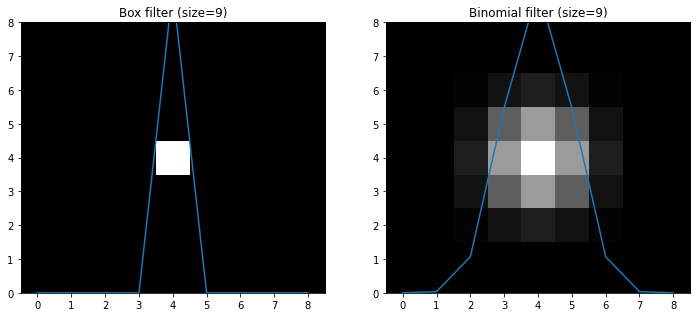

In [80]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

kernel_size = 9 # vary this
image_size = 9
# Why is image_size defining size of kernels?

# compute the kernel
box_kernel = np.zeros((image_size,image_size))
binomial_kernel = np.zeros((image_size,image_size))

# YOUR CODE HERE
box_kernel = (box_kernel + 1) * (1/(kernel_size*kernel_size))
n = kernel_size - 1
binomial_kernel_constructor = []
for i in range(kernel_size):
    binomial_kernel_constructor.append(binom(n, i))
binomial_kernel = np.array(binomial_kernel_constructor).reshape(1,len(binomial_kernel_constructor)) * np.array(binomial_kernel_constructor).reshape(len(binomial_kernel_constructor), 1)
print(binomial_kernel)
binomial_kernel = (1/np.sum(binomial_kernel)) * binomial_kernel

box_frequencies = np.fft.fftshift(np.fft.fft2(box_kernel))
binomial_frequencies = np.fft.fftshift(np.fft.fft2(binomial_kernel))

# plot kernel in frequency space
plt.figure(figsize=(12,6))
plt.gray()
plt.subplot(1,2,1)
plt.title(f"Box filter (size={kernel_size})")
plt.imshow(np.abs(box_frequencies))
plt.plot(np.arange(image_size), np.abs(box_frequencies)[image_size//2]*image_size)
plt.ylim(0, image_size-1)
plt.subplot(1,2,2)
plt.title(f"Binomial filter (size={kernel_size})")
plt.imshow(np.abs(binomial_frequencies))
plt.plot(np.arange(image_size), np.abs(binomial_frequencies)[image_size//2]*image_size)
plt.ylim(0, image_size-1)
plt.show()

When varying the kernel size, the figures in the frequency space change their size accordingly. However, while the square for the box filter always stays just one square, we can observe more squares with differing gray values when increasing the size of the binomial filter. From a kernel size of about 9 onwards, it becomes really hard to still see the outer square in the frequency space.

**b)** Implement a low pass filter and apply it to the given image with different cut off frequencies $F_\max$. What do you observe? Explain that observation and discuss how to improve the result.

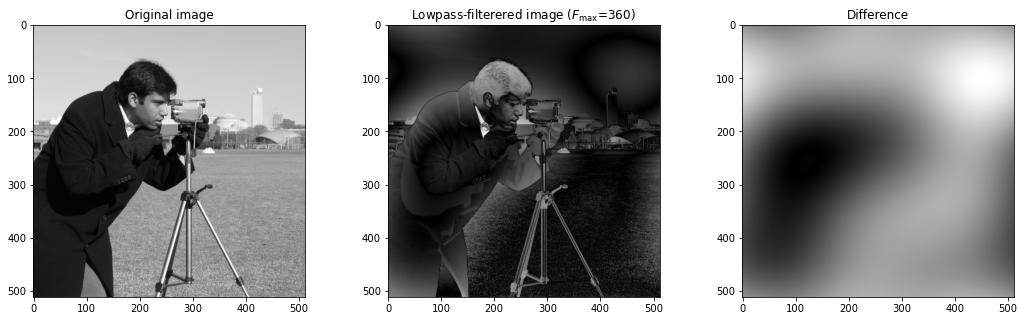

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage

f_max = 360
image = imageio.imread('imageio:camera.png')

def low_pass_filter(image, f_max):
    lp_freq_filter = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # How is filter in frequency space supposed to look like? (Circle in the middle or quarter circle in the corner?)
            if ((i-image.shape[0]/2)**2 + (j-image.shape[1]/2)**2 <= f_max*f_max):
            #if(i**2 + j**2 <= f_max**2):
                lp_freq_filter[i,j] = 1
    ft_image = np.fft.fft2(image)
    filtered_ft_image = ft_image * lp_freq_filter
    #result = ndimage.filters.convolve(image, lp_space_filter)
    return np.fft.ifft2(filtered_ft_image)
    #return lp_freq_filter

filtered_image = low_pass_filter(image, f_max=f_max)
# plt.imshow(np.abs(filtered_image))
# plt.show()
#plot kernel in frequency space
plt.figure(figsize=(18,5))
plt.gray()
plt.subplot(1,3,1); plt.title(f"Original image")
plt.imshow(image) 
plt.subplot(1,3,2); plt.title(f"Lowpass-filterered image ($F_\max$={f_max})")
plt.imshow(np.abs(filtered_image))
plt.subplot(1,3,3); plt.title(f"Difference")
plt.imshow(np.abs(filtered_image-image))
plt.show()

YOUR ANSWER HERE

**c)** What is a good kernel size for a Gaussian filter? Justify your answer.

A good size for a Gaussian filter is 3x3. This is because a larger size can lead to suppresion of higher spatial frequencies. That would result in a blurred image. Therefore, (if we have enough computational power) we should stick to a smaller kernel size and 3x3 is the smallest one that still makes sense.

**d)** Describe impulse ("salt and pepper") noise and explain what kind of filter should be used to remove such noise.

Salt and pepper noise means that we randomly have pixels that are either completely white or black. There are several filter with which we can remove salt & pepper noise from an image. The approach that might be most intuitive is to use a median filter of small size (e.g. 3x3). Using this filter, we will substitute the noise with the most prominent value of the pixels in its extended neighborhood.

## Exercise 5: Applying Fourier Transform [Bonus]

If you solve this exercise you may leave out one of the other exercises.


**a)** In order to apply the Custom Structuring Element to our satelite image in Assignment 4 of Sheet 3 we had to rotate the image. We had to measure the rotation angle by hand. We can now do this automatically via Fourier Transform.

1. Apply Fourier transform to the `img_gray`. The resulting amplitude should show the angle of the black lines.

1. Try to automatically get the rotation angle from the Fourier space. There are different ways to achieve this.
   Hints:
   * You may threshold the amplitudes, to only keep “relevant” values. You can then compute the angle of the largest relevant value.
   * Alternatively, you may apply methods you know from other lectures to get the main component and compute its angle.

1. Rotate the image back to its originally intended orientation (`skimage.transform.rotate`).

In [ ]:
%matplotlib inline
import numpy as np
from skimage import color
from skimage.transform import hough_line
from skimage.transform import rotate
import matplotlib.pyplot as plt

img = plt.imread('images/landsat_stack2.png')
img_gray = color.rgb2gray(img)

# YOUR CODE HERE

plt.show()

**b)** Can you think of other applications of Fourier Transform in Computer Vision?

Compression, Lane Detection, Edge Detection